# CS4035 - Cyber Data Analytics
## Lab 4

### Submit on brightspace (zip file with the name Group_xx.zip)
This jupyter file completed with code, plots, figures and report for each question. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.

(if you used hard-to-get libraries) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

## README

Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

## 1. Preparation (0 points)

### 1a. Load the dataset and split it into a train and test set

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
data = np.load("cda_lab4_data_2022/X.npy")
label = np.load("cda_lab4_data_2022/y.npy")
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)
X_train = X_train[:2500]
X_test = X_test[:2500]
y_train = y_train[:2500]
y_test = y_test[:2500]

In [5]:
model = SGDClassifier(loss='log_loss')
model.partial_fit(X_train, y_train, classes=np.unique(y_train))
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8928

## 2. Attacking linear models (5 Points)

### 2a. Implementing useless import attacks


In [6]:
def evade(sample, coef, n_libraries=10):
    library_indices = np.where(sample == 1)[0].tolist()
    neg_coef = np.random.permutation(np.where(coef[0] <  0))[0]
    sample_neg_coef = np.random.choice(neg_coef, n_libraries)
    library_indices.extend(sample_neg_coef.tolist())
    
    new_row = np.zeros(coef.shape[1])
    new_row[library_indices] = 1

    return new_row

In [15]:
malicious_samples = X_train[np.where(y_train == 1)]
coefficients = model.coef_

In [8]:
coefficients[0].shape

(22761,)

In [9]:
changes = []
for n in range(10, 500, 10):
    print(f"Adding {n} libraries")
    changed_prediction = 0
    for sample in malicious_samples:
        prediction  = model.predict([sample])[0]
        new_data = evade(sample, coefficients, n_libraries=n)
        evaded_prediction = model.predict([new_data])[0]
        changed_prediction += evaded_prediction != prediction
    print(f"Evaded {changed_prediction} detections\n")
    changes.append(changed_prediction/len(malicious_samples))

Adding 10 libraries
Evaded 82 detections

Adding 20 libraries
Evaded 194 detections

Adding 30 libraries
Evaded 334 detections

Adding 40 libraries
Evaded 492 detections

Adding 50 libraries
Evaded 575 detections

Adding 60 libraries
Evaded 643 detections

Adding 70 libraries
Evaded 690 detections

Adding 80 libraries
Evaded 753 detections

Adding 90 libraries
Evaded 818 detections

Adding 100 libraries
Evaded 892 detections

Adding 110 libraries
Evaded 939 detections

Adding 120 libraries
Evaded 977 detections

Adding 130 libraries
Evaded 983 detections

Adding 140 libraries
Evaded 987 detections

Adding 150 libraries
Evaded 994 detections

Adding 160 libraries
Evaded 994 detections

Adding 170 libraries
Evaded 1004 detections

Adding 180 libraries
Evaded 1006 detections

Adding 190 libraries
Evaded 1014 detections

Adding 200 libraries
Evaded 1020 detections

Adding 210 libraries
Evaded 1023 detections

Adding 220 libraries
Evaded 1026 detections

Adding 230 libraries
Evaded 1027 det

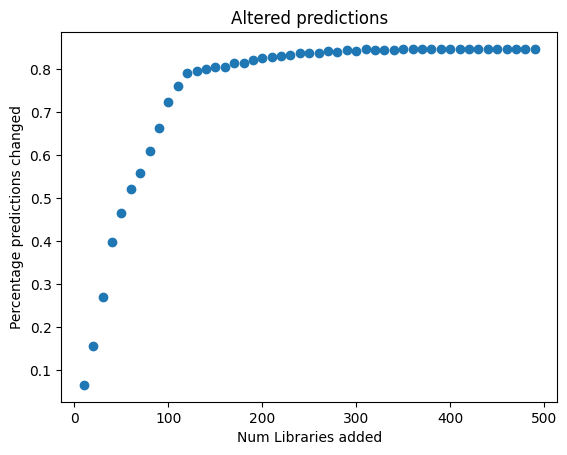

In [11]:
plt.plot(range(10,500,10), changes, 'o')
plt.title("Altered predictions")
plt.xlabel("Num Libraries added")
plt.ylabel("Percentage predictions changed")
plt.show()

In [12]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8928

In [14]:
malicious_indices

(array([   3,    5,    7, ..., 2496, 2497, 2499], dtype=int64),)

In [16]:
X_test_evaded = []
for sample in X_test:
    evaded_sample = evade(sample, coefficients, n_libraries=250)
    X_test_evaded.append(evaded_sample)
y_pred = model.predict(X_test_evaded)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4948

In [21]:
batch_size = 64

In [22]:
X_train_batch = np.array_split(X_train, len(X_train)//batch_size)
y_train_batch = np.array_split(y_train, len(y_train)//batch_size)

In [201]:
model = SGDClassifier(loss='log_loss', random_state=42)

for x, y in zip(X_train_batch, y_train_batch):
    model.partial_fit(x, y, classes=np.unique(y_train))
    

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8568

### 2b. Analysis and answers to the questions

## 3. Improving robustness by hardening (5 Points)

### 3a. Implementing hardening

In [42]:
X_train_evaded = []

for sample in X_train:
    evaded_sample = evade(sample, coefficients, n_libraries=250)
    X_train_evaded.append(evaded_sample)
    
X_train_evaded_batch = np.array_split(X_train_evaded, len(X_train_evaded)//batch_size)
y_train_batch = np.array_split(y_train, len(y_train)//batch_size)

model_2 = SGDClassifier(loss='log_loss', random_state=42)

accuracies = []
for x, y in zip(X_train_evaded_batch, y_train_batch):
    model_2.partial_fit(x, y, classes=np.unique(y_train))
    y_pred_evaded = model_2.predict(X_test_evaded)
    accuracy = accuracy_score(y_test, y_pred_evaded)
    accuracies.append(accuracy)

y_pred_2 = model_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_2)
accuracy

0.8804

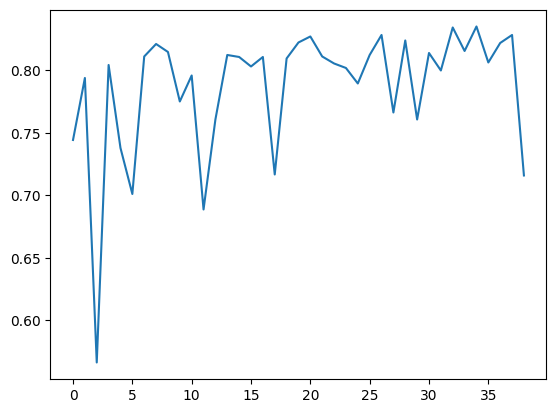

In [43]:
plt.plot(range(len(accuracies)), accuracies)

### 3b. Analysis and answers to the questions

## 4. Training non-negative linear models (5 Points)

### 4a. Implement non-negative logistic regression using SGD

In [39]:
model_3 = SGDClassifier(loss='log_loss', random_state=42)

accuracies = []
for x, y in zip(X_train_batch, y_train_batch):
    model_3.partial_fit(x, y, classes=np.unique(y_train))
#     print("before:", model_3.predict(X_test_evaded))
    while np.sum(model_3.coef_) < 0:
#         print(model_3.coef_)
        min_coef_index = np.argmin(model_3.coef_)
        model_3.coef_[0][min_coef_index] = 0
#     print("after: ",model_3.predict(X_test_evaded))
    print(len(y_pred_evaded), sum(y_pred_evaded))
    y_pred_evaded = model_3.predict(X_test_evaded)
    accuracy = accuracy_score(y_test, y_pred_evaded)
    accuracies.append(accuracy)
    
y_pred = model_3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

before: [1 0 0 ... 0 1 0]
after:  [1 1 0 ... 0 1 0]
2500 1168
before: [1 0 0 ... 0 1 0]
after:  [1 0 0 ... 0 1 0]
2500 1225
before: [1 0 0 ... 0 1 0]
after:  [1 0 0 ... 0 1 0]
2500 934
before: [1 0 0 ... 0 1 0]
after:  [1 0 0 ... 0 1 0]
2500 518
before: [1 0 0 ... 0 1 0]
after:  [1 0 0 ... 0 1 0]
2500 847
before: [1 0 0 ... 0 1 0]
after:  [1 0 0 ... 0 1 0]
2500 402
before: [1 0 0 ... 0 1 0]
after:  [1 0 0 ... 0 1 0]
2500 401
before: [1 1 0 ... 0 1 0]
after:  [1 1 0 ... 0 1 0]
2500 745
before: [1 0 0 ... 0 1 0]
after:  [1 0 0 ... 0 1 0]
2500 822
before: [1 0 0 ... 0 1 0]
after:  [1 0 0 ... 0 1 0]
2500 556
before: [0 0 0 ... 0 0 0]
after:  [0 0 0 ... 0 1 0]
2500 339
before: [1 0 0 ... 0 1 0]
after:  [1 0 0 ... 0 1 0]
2500 1057
before: [0 0 0 ... 0 0 0]
after:  [0 0 0 ... 0 0 0]
2500 5
before: [0 0 0 ... 0 0 0]
after:  [0 0 0 ... 0 0 0]
2500 12
before: [0 0 0 ... 0 0 0]
after:  [0 0 0 ... 0 0 0]
2500 183
before: [0 0 0 ... 0 1 0]
after:  [0 0 0 ... 0 1 0]
2500 479
before: [1 0 0 ... 0 1 0

0.8884

In [40]:
y_pred_evaded = model_3.predict(X_test_evaded)
accuracy = accuracy_score(y_test, y_pred_evaded)
accuracy

0.5072

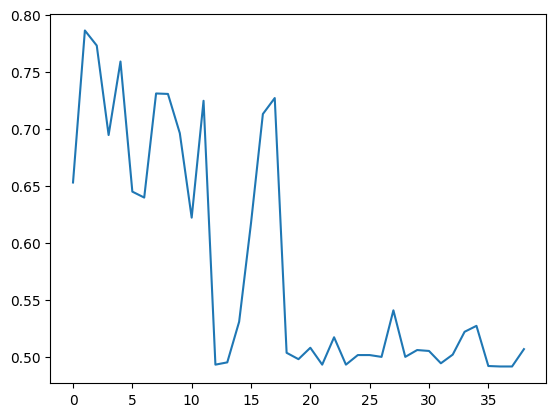

In [41]:
plt.plot(range(len(accuracies)), accuracies)

### 4b. Analysis and answers to the questions.

## 5. Bonus: robust decision trees for fraud detection (5 Points)

### 5a. Train and analyze a regular decision tree for fraud detection

### 5b. Train and analyze a robust decision tree (GROOT) for fraud detection

### 5c. Evaluate the robustness of the two models